Assignment 1
Neutron energy is 25.298854106520064 meV
Macroscopic total cross section of water is 1.8800313047355006 1/cm
Macroscopic total cross section of steam is 0.09146098239253786 1/cm
Macroscopic total cross section of mixture is 1.1646031757983155 1/cm
Macroscopic total cross section of water at atmospheric conditions is 2.540582844237163 1/cm

Assignment 2
The average number of neutrons emitted by fission of 235U with energy < 0.1 MeV is 0.0138957096027925
The average number of neutrons emitted by fission of 235U with energy > 10 MeV is 0.00107522235878116


Assignment 3
In order to double the absorption cross section of water, I need 874.1721854304637 ppm of B inside it

Assignment 4
Macroscopic total cross section of UO2 with U enriched at 4.0% is 0.8893835964517476 1/cm

Assignment 5
The total macroscopic cross section of the compound is 0.6430226914380301 1/cm
In case I am considering also the presence of air, the result is 0.643099908900523 1/cm, the difference between th

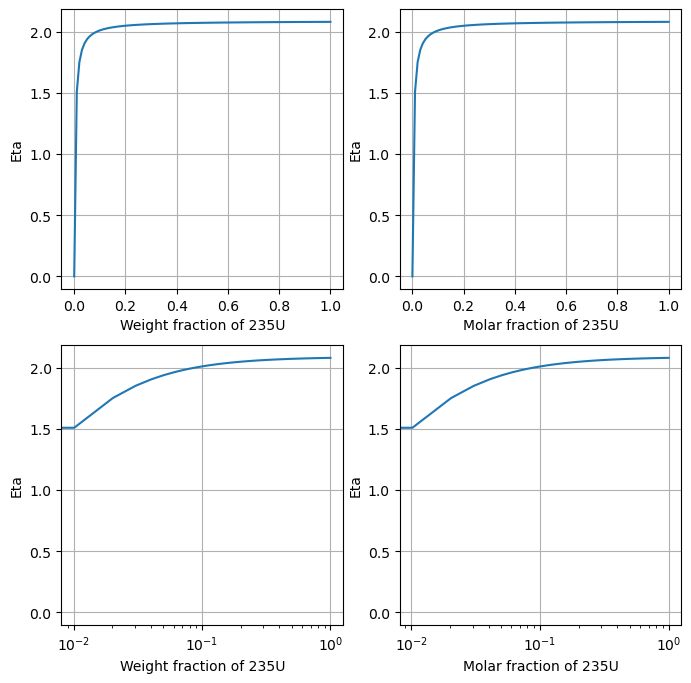

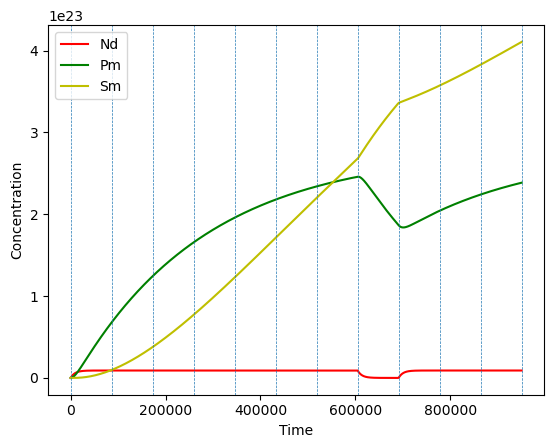

In [10]:
import math
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

########################################### ASSIGNMENT 1 ###########################################

# data:

density_water = 0.74   # g/cm^3
density_steam = 0.036  # g/cm^3

n_velocity = 2200             # sono abbastanza sicuro che il dato sia sbagliato, è in m/s, non cm/s          
n_mass = 1.674927 * 10 ** -27                                    # kg
from_J_to_eV = 6.241509 * 10 ** 18                               # eV/J
n_energy = 0.5 * n_mass * n_velocity**2 * from_J_to_eV           # eV

sigma_H = 38                   # mic cross section of H @ n_velocity in barns
sigma_O = 4.2 * 10 ** -5       # mic cross section of O @ n_velocity in barns

sigma_H = sigma_H * 10 ** -24  # cm^2
sigma_O = sigma_O * 10 ** -24  # cm^2

# question 1:

print('Assignment 1')

molar_mass_H = 1.00794  # g/mol
molar_mass_O = 15.999   # g/mol
molar_mass_H2O = 2 * molar_mass_H + molar_mass_O  # g/mol

avogadro_n = 6.02214076 * 10 ** 23  #   # of atoms/mol

N_H2O_water = density_water * avogadro_n / molar_mass_H2O   #   # of molecules/cm^3
N_H_water = N_H2O_water * 2                                 #   # of atoms/cm^3
N_O_water = N_H2O_water                                     #   # of atoms/cm^3

N_H2O_steam = density_steam * avogadro_n / molar_mass_H2O   #   # of molecules/cm^3
N_H_steam = N_H2O_steam * 2                                 #   # of atoms/cm^3
N_O_steam = N_H2O_steam                                     #   # of atoms/cm^3

SIGMA_water = sigma_H * N_H_water + sigma_O * N_O_water  # 1/cm
SIGMA_steam = sigma_H * N_H_steam + sigma_O * N_O_steam  # 1/cm

print(f'Neutron energy is {n_energy*1000} meV')
print(f'Macroscopic total cross section of water is {SIGMA_water} 1/cm')
print(f'Macroscopic total cross section of steam is {SIGMA_steam} 1/cm')

# question 2

steam_fraction = 0.4

SIGMA_mixture = SIGMA_steam * steam_fraction + SIGMA_water * (1 - steam_fraction)

print(f'Macroscopic total cross section of mixture is {SIGMA_mixture} 1/cm')


# at atmospheric conditions and room T, the mixture is composed just by liquid water:

density_water_at = 1  # g/cm^3

N_H2O_water_at = density_water_at * avogadro_n / molar_mass_H2O   #   # of molecules/cm^3
N_H_water_at = N_H2O_water_at * 2                                 #   # of atoms/cm^3
N_O_water_at = N_H2O_water_at                                     #   # of atoms/cm^3

SIGMA_water_at = sigma_H * N_H_water_at + sigma_O * N_O_water_at  # 1/cm

print(f'Macroscopic total cross section of water at atmospheric conditions is {SIGMA_water_at} 1/cm')

print('')



########################################### ASSIGNMENT 2 ###########################################

# data

def fission_n_spectrum(E_in, E_fi, n):
    
    # this function gets as input the initial and final neutron energy and the number of steps used to discretize this interval.
    # it gives as output the average number of neutrons emitted within this neutron energy interval computed through the mean point integration
    
    dE = (E_fi - E_in) / n
    neutrons = 0
    E1 = E_in
    E2 = E_in + dE
    
    for i in range(n):
        
        # X = fission spectrum of 235U as function of energy in MeV for thermal induced fission
        
        X1 = 0.453 * sp.exp(-1.036 * E1) * sp.sinh(sp.sqrt(2.29 * E1))
        X2 = 0.453 * sp.exp(-1.036 * E2) * sp.sinh(sp.sqrt(2.29 * E2))
        
        X_mean = (X2 + X1)/2
        
        neutrons = neutrons + X_mean * dE
        
        E1 = E1 + dE
        E2 = E2 + dE
        
        # now the cycle interrupts and starts again

    return neutrons

E_lim1 = 0.1         # MeV
E_lim2 = 10          # MeV
E_lim3 = 500         # MeV
n = 1000             # # of steps

# question

print('Assignment 2')


# QUESTO SOTTO è GIUSTO



neutrons1 = fission_n_spectrum(0,E_lim1,n)          # # of neutrons
neutrons2 = fission_n_spectrum(E_lim2,E_lim3,n)     # # of neutrons

print(f'The average number of neutrons emitted by fission of 235U with energy < {E_lim1} MeV is {neutrons1}')
print(f'The average number of neutrons emitted by fission of 235U with energy > {E_lim2} MeV is {neutrons2}')
print('')


# QUESTO SOPRA è GIUSTO



from sympy import *
x = symbols('x')
S = 0.453 * exp(-1.036 * x) * sinh(sqrt(2.29 * x))
#print('The spectrum is {}'. format(S))
#neutrons1 = integrate(S,(x,0,E0))
#neutrons2 = integrate(S,(x,E0,E_lim))

#S = 0.453 * exp(-1.036 * x) * sinh(sqrt(2.29 * x))
#integrate(S,(x,0,E0))

#print(neutrons1)

#print(f'The average number of neutrons emitted by fission of 235U with energy < {E0} MeV is {neutrons1}')
#print(f'The average number of neutrons emitted by fission of 235U with energy > {E0} MeV is {neutrons2}')
print('')


# NON DOVREBBE ESSERE >= 3 IL RISULTATO ??????


########################################### ASSIGNMENT 3 ###########################################

# data

sigma_ab_B = 755 * 10**-24     # cm^2
sigma_ab_H2O = 0.66 * 10**-24   # cm^2

MM_H2O = 18.016          # g/mol
MM_B = 10.82             # g/mol

H2O_density = 1          # g/cm^3
B_density = 2.45         # g/cm^3

# ????????????????????????????????
# BORO 10 O 11? FORSE QUELLO NATURALE? ACIDO BORICO O BORO NUDO E CRUDO? DI NORMA MI SEMBRA SI USI ACIDO BORICO ARRICCHITO CON 10B AL 50-90% (IN QUELLO NATURALE CE N'è SOLO IL 20%). è GIUSTO CALCOLARE COSì LA SIGMA DI UNA MISCELA?
# ????????????????????????????????


# question

print('Assignment 3')

H2O_atomic_density = H2O_density * avogadro_n / MM_H2O     # # of molecules/cm^3

SIGMA_ab_H2O = sigma_ab_H2O * H2O_atomic_density           # 1/cm

SIGMA_ab_mix = 2 * SIGMA_ab_H2O                            # 1/cm

# SIGMA_ab_mix = sigma_ab_H2O * H2O_atomic_density + sigma_ab_B * B_atomic_density
# sto supponendo di poter aggiungere B senza diminuire la densità atomica dell'acqua. Infatti sigma_ab_H2O è talmente < di sigma_ab_B che i conti non cambierebbero granché

B_atomic_density = (SIGMA_ab_mix - sigma_ab_H2O * H2O_atomic_density) / sigma_ab_B       # # of atoms/cm^3

B_fraction = B_atomic_density / H2O_atomic_density         # # of B atoms per H2O molecule

print(f'In order to double the absorption cross section of water, I need {B_fraction * 10**6} ppm of B inside it')
print('')




########################################### ASSIGNMENT 4 ###########################################

# data

U235_weight_fraction = 0.04                           # g of 235 / g of U
U238_weight_fraction = 1 - U235_weight_fraction       # g of 238 / g of U

sigma_235 = 700 * 10 ** -24             # cm^2
sigma_238 = 12 * 10 ** -24              # cm^2
sigma_O = 4.2 * 10 ** -5 * 10 ** -24    # cm^2

MM_235 = 235            # g/mol
MM_238 = 238            # g/mol
MM_O = 16               # g/mol

UO2_density = 10        # g/cm^3


# ????????????????????
# VA BENE QUESTA DENSITà DI UO2 O LA DEVO RICAVARE VISTO CHE NON è Unat MA U ARRICCHITO?
# nel caso sappi che la densità di UO2_nat è 10.96 e di UO2_235_100% è 10.838
# ???????????????


# question

print('Assignment 4')

# U23X_molar_fraction = U23X_fraction * MM_U / MM_23X = g23X/gU * gU/molU / g23X/mol23X = mol23X/molU
# U235_molar_fraction + U238_molar_fraction = 1
# 1 = U235_fraction * MM_U / MM_235 + U238_fraction * MM_U / MM_238
MM_U = 1 / (U235_weight_fraction / MM_235 + U238_weight_fraction / MM_238)    # g of U/mol of U
MM_UO2 = MM_U + 2 * MM_O                                                      # g of UO2/mol of UO2

U235_molar_fraction = U235_weight_fraction * MM_U / MM_235              # mol of 235/mol of U
U238_molar_fraction = U238_weight_fraction * MM_U / MM_238              # mol of 238/mol of U

#U_molar_fraction = 1               # mol of U / mol of UO2
#O_molar_fraction = 2               # mol of O / mol of UO2 

# U_weight_fraction = U_density / UO2_density

#U_weight_fraction = MM_U / MM_UO2 * U_molar_fraction          # g of U / g of UO2
#O_weight_fraction = MM_O / MM_UO2 * O_molar_fraction          # g of O / g of UO2

#UO2_density = U_density + O2_density = 
#gUO2/cm^3 = gU/cm^3 / gU/gUO2 = 

# X_density = X_weight_fraction * UO2_density = gX/cm^3
# UO2_density = U_density + O2_density = gUO2/cm^3
# 1 = U_weight_fraction + O_weight_fraction 



N_UO2 = UO2_density * avogadro_n / MM_UO2                        # # of molecules/cm^3
N_U = N_UO2                                                      # # of atoms/cm^3
N_235 = U235_molar_fraction * N_U                                # # of atoms/cm^3
N_238 = U238_molar_fraction * N_U                                # # of atoms/cm^3
N_O = N_UO2 * 2                                                  # # of molecules/cm^3

SIGMA_UO2 = sigma_235 * N_235 + sigma_238 * N_238 + sigma_O * N_O     # 1/cm

print(f'Macroscopic total cross section of UO2 with U enriched at {U235_weight_fraction*100}% is {SIGMA_UO2} 1/cm')
print('')


########################################### ASSIGNMENT 5 ###########################################

# data

air_vol_fraction = 0.15

MM_C = 12.011         # g/mol
MM_Fe = 55.85         # g/mol
MM_O = 16             # g/mol
MM_N = 14             # g/mol

C_density = 1.6          # g/cm^3
Fe_density = 7.7         # g/cm^3
air_density = 0.001293   # g/cm^3

sigma_C = 4.75 * 10**-24             # cm^2
sigma_Fe = 10.9 * 10**-24            # cm^2
sigma_O = 4.2 * 10**-5 * 10**-24     # cm^2
sigma_N = 11.9 * 10**-24             # cm^2

# question

print('Assignment 5')

# volume = volume of Fe/C

# SE IL VOLUME FINALE è 2 VOLTE QUELLO DEL Fe/C:
# mix_volume = 2 * volume                     
# air_volume = 0.15 * mix_volume
# Fe+C_volume = 0.85 * mix_volume
# C_density_mix = C_mass / mix_volume = (C_density * volume) / (mix_volume) = C_density / 2
# air_density_mix = air_mass / mix_volume = (air_density * 0.15 * mix_volume) / (mix_volume) = air_density * 0.15


# SE IL VOLUME FINALE è COMPOSTO DA UN 85% DI FeC (I QUALI OCCUPANO UN VOLUME PARI A 2 VOLTE QUELLO INIZIALE) E UN 15% DI ARIA:
# mix_volume = FeC_volume / 0.85 = 2/0.85 * volume
# C_density_mix = C_mass / mix_volume = (C_density * volume) / (mix_volume) = C_density * 0.85 / 2
# air_density_mix = air_mass / mix_volume = (air_density * 0.15 * mix_volume) / (mix_volume) = air_density * 0.15




C_density_mix = C_density / 2         # g/cm^3
Fe_density_mix = Fe_density / 2       # g/cm^3

C_atomic_density_mix = C_density_mix * avogadro_n / MM_C           # # of atoms/cm^3
Fe_atomic_density_mix = Fe_density_mix * avogadro_n / MM_Fe        # # of atoms/cm^3

SIGMA_FeC = C_atomic_density_mix * sigma_C + Fe_atomic_density_mix * sigma_Fe    # 1/cm

# I consider air as composed by 20% O2 and 80% N2

MM_air = 0.8 * 2 * MM_N + 0.2 * 2 * MM_O             # g/mol

air_density_mix = air_density * 0.15                                 # g/cm^3
air_atomic_density_mix = air_density_mix * avogadro_n / MM_air       # # of molecules/cm^3
O_atomic_density_mix = 2 * 0.2 * air_atomic_density_mix              # # of atoms/cm^3
N_atomic_density_mix = 2 * 0.8 * air_atomic_density_mix              # # of atoms/cm^3

SIGMA_FeCair = C_atomic_density_mix * sigma_C + Fe_atomic_density_mix * sigma_Fe + O_atomic_density_mix * sigma_O + N_atomic_density_mix * sigma_N    # 1/cm

print(f'The total macroscopic cross section of the compound is {SIGMA_FeC} 1/cm')
print(f'In case I am considering also the presence of air, the result is {SIGMA_FeCair} 1/cm, the difference between this two is {abs(SIGMA_FeCair - SIGMA_FeC) / SIGMA_FeC * 100}%, so I can neglect air cross section')
print('')



########################################### ASSIGNMENT 6 ###########################################

# For thermal neutrons calculate eta as a function of uranium enrichment (in atoms and in weight) and plot your results

# data

sigma_f_235 = 590 * 10**-24                 # cm^2
sigma_f_238 = 1.69e-5 * 10**-24             # cm^2

sigma_g_235 = 100 * 10**-24                 # cm^2
sigma_g_238 = 2.7 * 10**-24                 # cm^2

sigma_a_235 = sigma_f_235 + sigma_g_235     # cm^2
sigma_a_238 = sigma_f_238 + sigma_g_238     # cm^2
sigma_a_O = 20e-5 * 10**-24                 # cm^2

nu_235 = 2.432               # average # of n released by fission of 235
nu_238 = 2.44                # average # of n released by fission of 238

MM_235 = 235        # g/mol
MM_238 = 238        # g/mol
MM_O = 16           # g/mol

density_235 = 18.811    # g/cm^3 of an entire sample of 235
density_238 = 19.052    # g/cm^3 of an entire sample of 238
UO2_density = 10        # g/cm^3 

# previous data from ENDF-6

# question

# eta = (nu_235*SIGMA_f_235 + nu_238*SIGMA_f_238) / (SIGMA_a_235 + SIGMA_a_238 + SIGMA_a_O)
# SIGMA_a_O can be neglected since sigma_a_O is << than other terms

# eta = (nu_235*SIGMA_f_235 + nu_238*SIGMA_f_238) / (SIGMA_a_235 + SIGMA_a_238) = (nu_235*sigma_f_235*N_235 + nu_238*sigma_f_238_N_238) / (sigma_a_235*N_235 + sigma_a_238*N_238)
# N_UO2 = UO2_density * avogadro_n / MM_UO2
# N_U = N_UO2
# N_235 = molar_fraction_235 * N_U
# N_238 = molar_fraction_238 * N_U

# => eta = (nu_235 * molar_fraction_235 * sigma_f_235 + nu_238 * molar_fraction_238 * sigma_f_238) / (molar_fraction_235 * sigma_a_235 + molar_fraction_238 * sigma_a_238)

weight_fraction_235 = np.linspace(0,1,100)                           # g of 235/g of U
weight_fraction_238 = np.ones(100) - weight_fraction_235             # g of 238/g of U

MM_U = 1 / (weight_fraction_235 / MM_235 + weight_fraction_238 / MM_238)      # g of U/mol of U

molar_fraction_235 = weight_fraction_235 * MM_U / MM_235              # mol of 235/mol of U
molar_fraction_238 = weight_fraction_238 * MM_U / MM_238              # mol of 238/mol of U

eta = (nu_235 * molar_fraction_235 * sigma_f_235 + nu_238 * molar_fraction_238 * sigma_f_238) / (molar_fraction_235 * sigma_a_235 + molar_fraction_238 * sigma_a_238)

fig, ((graph1, graph2), (graph3, graph4)) = plt.subplots(2, 2, figsize=(8,8))

graph1.plot(weight_fraction_235, eta)
graph1.set(xlabel='Weight fraction of 235U', ylabel='Eta')
graph1.grid()

graph2.plot(molar_fraction_235, eta)
graph2.set(xlabel='Molar fraction of 235U', ylabel='Eta')
graph2.grid()

graph3.semilogx(weight_fraction_235, eta)
graph3.set(xlabel='Weight fraction of 235U', ylabel='Eta')
graph3.grid()

graph4.semilogx(molar_fraction_235, eta)
graph4.set(xlabel='Molar fraction of 235U', ylabel='Eta')
graph4.grid()

#weight_fraction_U = MM_U / MM_UO2             # (gU/molUO2) / (gUO2/molUO2) = gU/gUO2
#weight_fraction_O = 2 * MM_O / MM_UO2         # (gO/molUO2) / (gUO2/molUO2) = gO/gUO2

#U_density = density_235 * weight_fraction_235 + density_238 * weight_fraction_238     # g/cm^3 of an entire sample of U


#UO2_density = UO2_density * (weight_fraction_238 )


#UO2_density = U_density * weight_fraction_U + O_density * weight_fraction_O


# UO2_density = MM_UO2 * N_UO2 / avogadro_n = (MM_U + 2*MM_O) * N_UO2 / avogadro = (MM_U*N_U + 2*MM_O*N_O) / avogadro_n = U_density_mix + O_density_mix = U_density * weight_fraction_U + O_density * weight_fraction_O


#N_235 = density_235 * avogadro_n / MM_235                             # atoms/cm^3 of an entire sample of 235
#N_238 = density_238 * avogadro_n / MM_238                             # atoms/cm^3 of an entire sample of 238
#N_U = N_235 * molar_fraction_235 + N_238 * molar_fraction_238         # atoms/cm^3 of an entire sample of U

#U_molar_fraction = 1               # mol of U / mol of UO2
#O_molar_fraction = 2               # mol of O / mol of UO2 

# U_weight_fraction = U_density / UO2_density


#UO2_density = U_density + O2_density = 
#gUO2/cm^3 = gU/cm^3 / gU/gUO2 = 

# X_density = X_weight_fraction * UO2_density = gX/cm^3
# UO2_density = U_density + O2_density = gUO2/cm^3
# 1 = U_weight_fraction + O_weight_fraction 

# UO2_density = O_density_mix + U_density_mix = const + U_mass / UO2_volume = O_mass / UO2_volume + (235_mass + 238_mass) / UO2_volume = const + ()



########################################### ASSIGNMENT 7 ###########################################

#A sodium-cooled fast reactor is fuelled with PuO2, mixed with depleted UO2. The structural material is iron.
#Averaged over the spectrum of fast neutrons, the microscopic cross sections and densities are the following:
#The fuel is 15% PuO2 and 85% UO2 by volume. The volumetric composition of the core is 30% fuel, 50%
#coolant and 20% structural material. Calculate κ∞ assuming that the values of u for plutonium and uranium
#in the fast spectrum are 2.98 and 2.47, respectively, and that the cross sections of oxygen can be neglected.
#What fraction of the mass of the core does the fuel account for?

# data

sigma_f_PuO2 = 1.95 *10**-24        # cm^2
sigma_f_UO2 = 0.05 *10**-24         # cm^2

sigma_a_PuO2 = 2.4 *10**-24         # cm^2
sigma_a_UO2 = 0.404 *10**-24        # cm^2
sigma_a_Na = 0.0018 *10**-24        # cm^2
sigma_a_Fe = 0.0087 *10**-24        # cm^2

sigma_t_PuO2 = 8.6 *10**-24         # cm^2
sigma_t_UO2 = 8.2 *10**-24          # cm^2
sigma_t_Na = 3.7 *10**-24           # cm^2
sigma_t_Fe = 3.6 *10**-24           # cm^2
# O cross section is negligible

density_PuO2 = 11                   # g/cm^3
density_UO2 = 11                    # g/cm^3
density_Na = 0.97                   # g/cm^3
density_Fe = 7.87                   # g/cm^3

volume_fraction_UO2 = 0.85
volume_fraction_PuO2 = 0.15

volume_fraction_fuel = 0.3
volume_fraction_coolant = 0.5
volume_fraction_structure = 0.2

nu_Pu = 2.98
nu_U = 2.47

MM_235 = 235 
MM_238 = 238
MM_Pu = 239
MM_O = 16
MM_Na = 23
MM_Fe = 55.85

weight_fraction_235 = 0.002
weight_fraction_238 = 0.998

# question

print('Assignment 7')

# volume_fraction_X = volume_X / total volume
# density_fuel_X = density_X * volume_fraction_X = (mass_X / volume_X) * (volume_X / volume_fuel) = mass_X / volume_fuel

density_fuel_PuO2 = density_PuO2 * volume_fraction_PuO2                   # g of PuO2/cm^3 of fuel
density_fuel_UO2 = density_UO2 * volume_fraction_UO2                      # g of UO2/cm^3 of fuel

density_core_PuO2 = density_fuel_PuO2 * volume_fraction_fuel              # g of PuO2/cm^3 of core
density_core_UO2 = density_fuel_UO2 * volume_fraction_fuel                # g of UO2/cm^3 of core
density_core_Na = density_Na * volume_fraction_coolant                    # g of Na/cm^3 of core
density_core_Fe = density_Fe * volume_fraction_structure                  # g of Fe/cm^3 of core

density_core_fuel = density_core_PuO2 + density_core_UO2                  # g of fuel/cm^3 of core

# mass_fraction_core_fuel = density_core_fuel / density_core_total = density_core_fuel / (density_core_fuel + density_core_coolant + density_core_structure) = (mass_fuel / volume_core) / ((mass_fuel / volume_core) + (mass_coolant / volume_core) + (mass_structure / volume_core)) = mass_fuel / (mass_fuel + mass_coolant + mass_structure)

mass_fraction_core_fuel = density_core_fuel / (density_core_fuel + density_core_Na + density_core_Fe)      # mass of fuel / mass of core



# k_inf = eta * epsilon * p * f

# eta = # of n produced by thermal fission / # of thermal n absorbed in the fuel
# epsilon = # of n generated by both thermal and fast fission / # of n generated just by thermal fission
# p = probability that a n escapes resonance capture = # of n that reach thermal E / # of n that slow down
# f = # of thermal n absorbed in fuel / # of thermal n absorbed in the entire core

# In case I'm considering average quantities over space and energy:
# k_inf = eta * f
# eta = # of n produced by fission / # of n absorbed in the fuel
# f = # of n absorbed in fuel / # of n absorbed in the entire core

MM_U = 1 / (weight_fraction_235 / MM_235 + weight_fraction_238 / MM_238)      # g of U/mol of U
MM_UO2 = MM_U + 2 * MM_O                                                      # g of U/mol of U
MM_PuO2 = MM_Pu + 2 * MM_O                                                    # g of U/mol of U

molar_fraction_235 = weight_fraction_235 * MM_U / MM_235                      # mol of 235/mol of U
molar_fraction_238 = weight_fraction_238 * MM_U / MM_238                      # mol of 238/mol of U

# atomic density of X respect to 1 cm^3 of core
N_fuel_UO2 = density_fuel_UO2 * avogadro_n / MM_UO2                           # atoms/cm^3
N_fuel_PuO2 = density_fuel_PuO2 * avogadro_n / MM_PuO2                        # atoms/cm^3

N_core_UO2 = N_fuel_UO2 * volume_fraction_fuel                                # atoms/cm^3
N_core_PuO2 = N_fuel_PuO2 * volume_fraction_fuel                              # atoms/cm^3

N_core_Na = density_core_Na * avogadro_n / MM_Na                              # atoms/cm^3
N_core_Fe = density_core_Fe * avogadro_n / MM_Fe                              # atoms/cm^3

SIGMA_f_fuel_UO2 = N_fuel_UO2 * sigma_f_UO2                                   # 1/cm
SIGMA_f_fuel_PuO2 = N_fuel_PuO2 * sigma_f_PuO2                                # 1/cm
SIGMA_a_fuel_UO2 = N_fuel_UO2 * sigma_a_UO2                                   # 1/cm 
SIGMA_a_fuel_PuO2 = N_fuel_PuO2 * sigma_a_PuO2                                # 1/cm

SIGMA_a_core_UO2 = N_core_UO2 * sigma_a_UO2                                   # 1/cm
SIGMA_a_core_PuO2 = N_core_PuO2 * sigma_a_PuO2                                # 1/cm
SIGMA_a_core_Na = N_core_Na * sigma_a_Na                                      # 1/cm
SIGMA_a_core_Fe = N_core_Fe * sigma_a_Fe                                      # 1/cm

eta = (nu_U * SIGMA_f_fuel_UO2 + nu_Pu * SIGMA_f_fuel_PuO2) / (SIGMA_a_fuel_UO2 + SIGMA_a_fuel_PuO2)
f = (SIGMA_a_core_UO2 + SIGMA_a_core_PuO2) / (SIGMA_a_core_UO2 + SIGMA_a_core_PuO2 + SIGMA_a_core_Na + SIGMA_a_core_Fe)

k_inf = eta * f

print(f'The weight fraction of the fuel respect to the total mass of the core is {mass_fraction_core_fuel}')
print(f'The value of infinite medium multiplication factor is {k_inf}')
print('')


########################################### ASSIGNMENT 8 ###########################################

# Suppose the non-leakage probability for a sodium cooled fast reactor specified in problem 7 is 0.90. Using
# the data from problem 7, adjust the volume fractions of PuO2 and UO2 in the fuel so that κ = 1.0. What is
# the % in the fuel by volume?

# data 

k = 1
p_NL = 0.9

# question

print('Assignment 8')

# k = k_inf * p_NL = eta * f * p_NL

k_inf = k / p_NL

# k/p_NL = eta*f
# k/p_NL * (SIGMA_a_core_UO2 + SIGMA_a_core_PuO2 + SIGMA_a_core_Na + SIGMA_a_core_Fe) = (nu_U * SIGMA_f_fuel_UO2 + nu_Pu * SIGMA_f_fuel_PuO2) * (SIGMA_a_core_UO2 + SIGMA_a_core_PuO2) / (SIGMA_a_fuel_UO2 + SIGMA_a_fuel_PuO2)
# ... :

A = nu_U * density_UO2 * sigma_f_UO2 / MM_UO2 - nu_Pu * density_PuO2 * sigma_f_PuO2 / MM_PuO2
B = nu_Pu * density_PuO2 * sigma_f_PuO2 / MM_PuO2
C = volume_fraction_fuel * density_UO2 * sigma_a_UO2 / MM_UO2 - volume_fraction_fuel * density_PuO2 * sigma_a_PuO2 / MM_PuO2
D = volume_fraction_fuel * density_PuO2 * sigma_a_PuO2 / MM_PuO2
E = k/p_NL * (SIGMA_a_core_Na / avogadro_n + SIGMA_a_core_Fe / avogadro_n + volume_fraction_fuel * density_PuO2 * sigma_a_PuO2 / MM_PuO2)
F = density_UO2 * sigma_a_UO2 / MM_UO2 - density_PuO2 * sigma_a_PuO2 / MM_PuO2
G = density_PuO2 * sigma_a_PuO2 / MM_PuO2

x1 = (-(E*F + G*C/p_NL - A*D - B*C) + math.sqrt((E*F + G*C/p_NL - A*D - B*C)**2 - 4*(G*E - B*D)*(k/p_NL*C*F - A*C))) / (2*(k/p_NL*C*F - A*C))
x2 = (-(E*F + G*C/p_NL - A*D - B*C) - math.sqrt((E*F + G*C/p_NL - A*D - B*C)**2 - 4*(G*E - B*D)*(k/p_NL*C*F - A*C))) / (2*(k/p_NL*C*F - A*C))

if x1>0 and x1<1:
    new_UO2_volume_fraction = x1
else:
    new_UO2_volume_fraction = x2

print(f'The new volume fraction of UO2 and PuO2 in the fuel should become respectively: {new_UO2_volume_fraction} and {1-new_UO2_volume_fraction}')
print('')


########################################### ASSIGNMENT 9 ###########################################
# An important difference between Xe135 and Sm149 is that samarium 149 is a stable isotope and remains in
# the core after shutdown. There are only two ways of samarium removal, and one of these processes is the
# samarium burn up when the reactor is at power operation. The samarium burnup rate depends upon the
# neutron flux and the samarium 149 concentration (i.e., the reaction rate).

# Use the following data to compute the reaction rate: mass U = 100 t, enrichment = 0.02, thermal power =
# 3 GW, σf = 585 b, energy per fission = 200.7 MeV and the data reported in figure.
# From the decay chain listed above, compute the Promethium and Samarium concentration (initial concentration equal to zero) for:
# • 7 days reactor operation
# • after 7 days, shutdown for 1 day
# • reactor restart and operation for 3 days

# data

U_mass = 100e6                                        # g
enrichment = 0.02
thermal_power = 3e9                                   # W
sigma_f_235 = 585 *10**-24                            # cm^2
sigma_a_Sm = 42e3 *10**-24                            # cm^2
energy_per_fission = 200.7e6                          # eV
operation_period = 7                                  # days
Nd_yield = 0.0108
lambda_Nd = np.log(2)/(1.73 * 60 * 60)                        # 1/s
lambda_Pm = np.log(2)/(53.1 * 60 * 60)                        # 1/s

J_to_eV = 1.60218e-19                                 # J/eV

# question 

print('Assignment 9')

operation_period = 7 * 24 * 60 * 60                      # s
shutdown_period = 24 * 60 * 60
restart_period = 3 * 24 * 60 * 60

points_a = operation_period + 1
points_b = shutdown_period + 1
points_c = restart_period + 1

ones_array_a = np.ones(points_a)
ones_array_b = np.ones(points_b)
ones_array_c = np.ones(points_c)

time_operation = np.linspace(0,operation_period,points_a)    # s
time_shutdown = np.linspace(0,shutdown_period,points_b)      # s
time_restart = np.linspace(0,restart_period,points_c)        # s

thermal_power = thermal_power / J_to_eV               # eV/s

# [fission/s] * [energy/fission] = [thermal power]

fission_rate = thermal_power / energy_per_fission     # reaction/s

U235_mass = U_mass * enrichment                       # 235 g
N_235 = U235_mass / MM_235 * avogadro_n               # 235 atoms

# fission_rate = sigma_f_235 * N_235 * n_flux
n_flux = fission_rate / (sigma_f_235 * N_235)         # 

print(n_flux*sigma_a_Sm)
print(lambda_Pm)

# I suppose that 235 mass and n flux remain const in this short considered time intervals

# a)

# N_Nd_rate = Nd_yield * fission_rate - lambda_Nd * N_Nd    
# N_Pm_rate = lambda_Nd * N_Nd - lambda_Pm * N_Pm
# RR = sigma_a_Sm * N_Sm * n_flux
# N_Sm_rate = lambda_Pm * N_Pm - RR 

N_Nd_a = - Nd_yield * fission_rate / lambda_Nd * np.exp(- lambda_Nd*time_operation) + Nd_yield * fission_rate / lambda_Nd * ones_array_a
N_Pm_a = - Nd_yield * fission_rate * (1 / (lambda_Nd - lambda_Pm) + 1 / lambda_Pm) * np.exp(- lambda_Pm * time_operation) + Nd_yield * fission_rate / (lambda_Nd - lambda_Pm) * np.exp(- lambda_Nd*time_operation) + Nd_yield * fission_rate / lambda_Pm * ones_array_a
N_Sm_a = Nd_yield * fission_rate * (lambda_Pm / (lambda_Pm - lambda_Nd) - 1) / (sigma_a_Sm * n_flux - lambda_Pm) * np.exp(- lambda_Pm * time_operation) + Nd_yield * fission_rate / (lambda_Nd - lambda_Pm) * lambda_Pm / (sigma_a_Sm * n_flux - lambda_Nd) * np.exp(- lambda_Nd*time_operation) + Nd_yield * fission_rate / (sigma_a_Sm * n_flux) * ones_array_a - (Nd_yield * fission_rate * (lambda_Pm / (lambda_Pm - lambda_Nd) - 1) / (sigma_a_Sm * n_flux - lambda_Pm) + Nd_yield * fission_rate / (lambda_Nd - lambda_Pm) * lambda_Pm / (sigma_a_Sm * n_flux - lambda_Nd) + Nd_yield * fission_rate / (sigma_a_Sm * n_flux)) * np.exp(-sigma_a_Sm * n_flux * time_operation)

# b)

# ????????????????????????????????????????
# COME CONSIDERO LO SHUTDOWN E IL RESTART? HANNO EFFETTO IMMEDIATO O IL FLUSSO DI NEUTRONI E IL FISSION RATE DECADONO CON UNA CERTA LEGGE? 
# ???????????????????????????????????????

# fission_rate, n_flux, RR = 0

# N_Nd_rate = - lambda_Nd * N_Nd    
# N_Pm_rate = lambda_Nd * N_Nd - lambda_Pm * N_Pm
# N_Sm_rate = lambda_Pm * N_Pm

N_Nd_b = N_Nd_a[-1] * np.exp(-lambda_Nd * time_shutdown)
N_Pm_b = N_Pm_a[-1] * np.exp(-lambda_Pm * time_shutdown) + (lambda_Nd * N_Nd_a[-1] / (lambda_Nd - lambda_Pm)) * (np.exp(- lambda_Pm * time_shutdown) - np.exp(- lambda_Nd * time_shutdown))
N_Sm_b = N_Sm_a[-1] * ones_array_b + (N_Pm_a[-1] + lambda_Nd*N_Nd_a[-1]/(lambda_Nd-lambda_Pm)) * (ones_array_b - np.exp(-lambda_Pm*time_shutdown)) + lambda_Pm*N_Nd_a[-1]/(lambda_Nd-lambda_Pm) * (np.exp(-lambda_Nd*time_shutdown) - ones_array_b)

# c)  

N_Nd_c = (N_Nd_b[-1] - Nd_yield * fission_rate / lambda_Nd) * np.exp(-lambda_Nd * time_restart) + Nd_yield * fission_rate / lambda_Nd * ones_array_c
N_Pm_c = (N_Pm_b[-1] - (Nd_yield * fission_rate - N_Nd_b[-1] * lambda_Nd) / (lambda_Nd - lambda_Pm) - Nd_yield * fission_rate / lambda_Pm) * np.exp(- lambda_Pm * time_restart) + (Nd_yield * fission_rate - N_Nd_b[-1] * lambda_Nd) / (lambda_Nd - lambda_Pm) * np.exp(- lambda_Nd * time_restart) + Nd_yield * fission_rate / lambda_Pm * ones_array_c
N_Sm_c = N_Sm_b[-1]*np.exp(-sigma_a_Sm*n_flux*time_restart) + Nd_yield*fission_rate/(sigma_a_Sm*n_flux) * (ones_array_c - np.exp(-sigma_a_Sm*n_flux*time_restart)) + (Nd_yield*fission_rate - N_Nd_b[-1]*lambda_Nd)/(lambda_Nd-lambda_Pm)*(lambda_Pm/(sigma_a_Sm*n_flux-lambda_Nd)) * (np.exp(-lambda_Nd*time_restart) - np.exp(-sigma_a_Sm*n_flux*time_restart)) + (lambda_Pm/(sigma_a_Sm*n_flux-lambda_Pm))*(N_Pm_b[-1]-(Nd_yield*fission_rate-N_Nd_b[-1]*lambda_Nd)/(lambda_Nd-lambda_Pm)-Nd_yield*fission_rate/lambda_Pm) * (np.exp(-lambda_Pm*time_restart) - np.exp(-sigma_a_Sm*n_flux*time_restart))

time = np.linspace(0,operation_period + shutdown_period + restart_period, operation_period + shutdown_period + restart_period + 1)
N_Nd = np.concatenate((N_Nd_a, N_Nd_b[1:], N_Nd_c[1:]))
N_Pm = np.concatenate((N_Pm_a, N_Pm_b[1:], N_Pm_c[1:]))
N_Sm = np.concatenate((N_Sm_a, N_Sm_b[1:], N_Sm_c[1:]))

plt.figure()

plt.plot(time, N_Nd, 'r', label = "Nd")
plt.plot(time, N_Pm, 'g', label = "Pm")
plt.plot(time, N_Sm, 'y', label = "Sm")
day = 60*60*24     # s/day
days = day * np.arange(0, 12)
for x in days:
    plt.axvline(x, linestyle='dashed', linewidth='0.5')
plt.legend()
#plt.grid()
plt.xlabel('Time')
plt.ylabel('Concentration')

print(f'After 7 days of operation, the concentration of Pm and Sm in the reactor are respectively: {N_Pm_a[-1]} and {N_Sm_a[-1]}')
print(f'After 1 day shutdown, the concentration of Pm and Sm in the reactor are respectively: {N_Pm_b[-1]} and {N_Sm_b[-1]}')
print(f'After 3 days from the restart, the concentration of Pm and Sm in the reactor are respectively: {N_Pm_c[-1]} and {N_Sm_c[-1]}')

print(N_Nd_b[0])
print(N_Nd_b[1])

In [10]:
a=np.arange(1,7)
print(a)

[1 2 3 4 5 6]
